# Uncertainty indicators for property fields

In the geosciences, uncertainty quantification relies on ensemble of models / realizations. 

The type of variables analysed can be viewed as:
 - Inputs for forward models (such as geomodelling, geophysical, hyrogeological, ... engines )
 - Model outputs
, which can be either of them e.g. density can be the output of a geo-modelling engine and an input for a geo-physical simulation.

Or they can also be depicted as:
 - Categorical: 
     - lithocode
     - any classification code  
 - Continuous: 
     - potential fields (from implicit modeling)
     - hydro-, geo-, petro-, physical- properties (e.g. porosity, hydraulic conductivity, density, mag, velocity, ...)

<div class="alert alert-block alert-warning">
    <b>Warning:</b> Indicators based on discrete or categorical variable require a standard classification for the realizations of the considered ensemble. Note that it is not the case for the 1 million noddyverse models, but we will ignore this fact, just to illustrate the computation of the indicators. 
</div>
    
Here, we focus on uncertainty quantification of property field and for the purpose of illustration we will use the following: 
 - 3D litho code (categorical)
 - 3D underlying scalar-field (continuous), byproduct of implicit modelling

Given an ensemble of property fields, there are two main ways to compute uncertainty indicators:
 - based on local cell comparison throughout the ensemble of realizations (e.g. Cardinality or Entropy) - note that it requires the same meshing for all realizations of the ensemble
 - using distances (Wasserstein, Jenson-Shannon, Fisher information metric ...) between summary statistics (e.g. semi-variogram, connectivity functions, MPH, topology indicators (matrices+....), persistent homology... that are computed for each realization) - in that case meshing might vary, and it enables the classification of realizations of an ensemble into clusters

One can note that cell-based uncertainty indicators will provide information about the local spatial variability of the property fields while distance-based ones will inform more about structural dis-similarity of the property fields.

# Dependencies
To run these notebooks:
% - noddyverse (available at https://github.com/Loop3D/noddyverse) 
 - numpy
 - pandas
 - urllib
 - gzip
 - matplotlib
 - datetime
 - pickle
 - seaborn
 - sklearn
 - scipy
 - pywt
 - mpl_toolkits
 

# Download property fields


In [1]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
import pickle
from loopui import load_ls_gocad_voxets,plot_voxet

picklefilenamedata = "./pickledata/synthetic-case-data.pickle"
import os #,glob
if not os.path.exists('pickledata'):
    os.makedirs('pickledata')

if not os.path.exists(picklefilenamedata):
    clblab = 'lithocode' # colorbar label prefix
    clblabsf = 'scalar-field'
    # DOWNLOAD DATA
    print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DOWNLOADING VOXETS.")
    lithocode_100,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-100-my","*.vop1") 
    lithocode_50A,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-50A-my","*.vop1") 
    lithocode_50B,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-50B-my","*.vop1") 
    scalarfield_100,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-100-sc","*.vop1") 
    scalarfield_50A,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-50A-sc","*.vop1") 
    scalarfield_50B,nx,ny,nz,nbsamples = load_ls_gocad_voxets("voxet/simpHamUncf-perturbed-50B-sc","*.vop1") 
    print(str(nbsamples)+' models downloaded')
    # SAVE OUTPUT
    with open(picklefilenamedata, 'wb') as f:
        pickle.dump([lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf], f)

        # plotting parameters
slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!

# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)


29-Jun-2022 (17:25:49) - DOWNLOADING VOXETS.
10 models downloaded


## Property field plots

29-Jun-2022 (17:25:50) - CONTROL PLOTs OF 10 lithocode_100 MODELS.


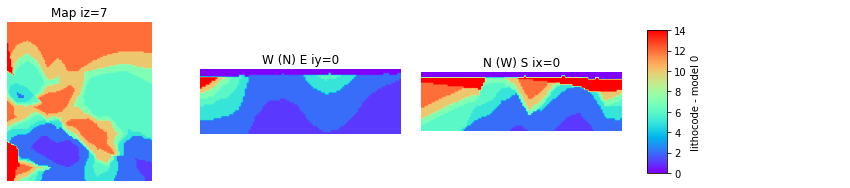

29-Jun-2022 (17:25:50) - CONTROL PLOTs OF 10 lithocode_50A MODELS.


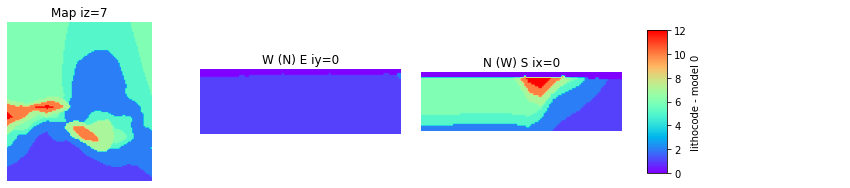

29-Jun-2022 (17:25:51) - CONTROL PLOTs OF 10 lithocode_50B MODELS.


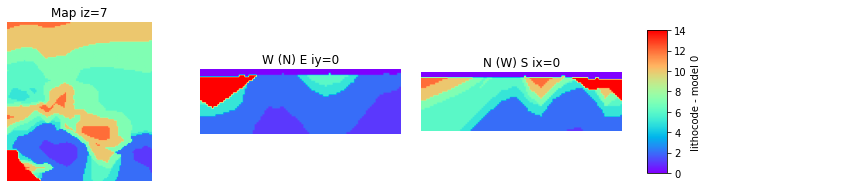

29-Jun-2022 (17:25:51) - CONTROL PLOTs OF 10 scalarfield_100 MODELS.


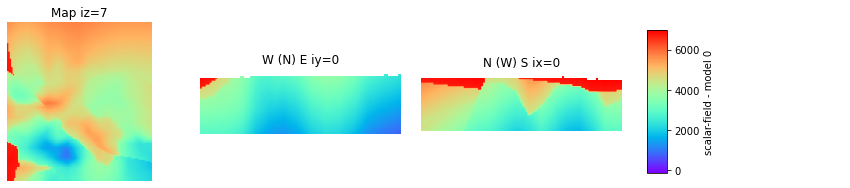

29-Jun-2022 (17:25:51) - CONTROL PLOTs OF 10 scalarfield_50A MODELS.


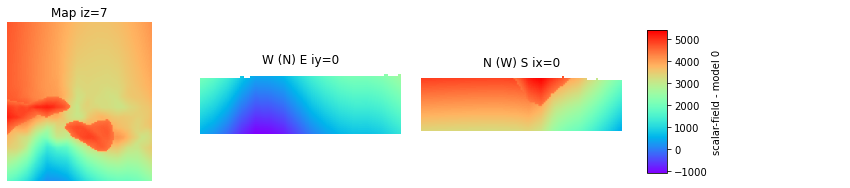

29-Jun-2022 (17:25:51) - CONTROL PLOTs OF 10 scalarfield_50B MODELS.


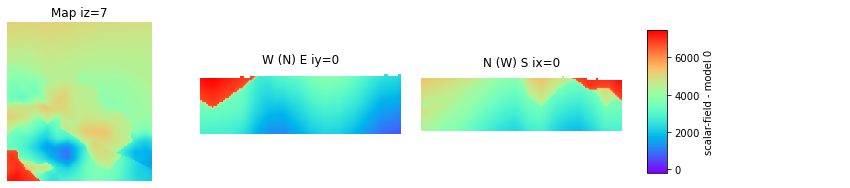

In [2]:
# CONTROL PLOT
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" lithocode_100 MODELS.")
for s in [0]: #range(nbsamples): #
    plot_voxet(lithocode_100,s,clblab,slice_ix,slice_iy,slice_iz,aspectratio)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" lithocode_50A MODELS.")
for s in [0]: #range(nbsamples): #[0]: #
    plot_voxet(lithocode_50A,s,clblab,slice_ix,slice_iy,slice_iz,aspectratio)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" lithocode_50B MODELS.")
for s in [0]: #range(nbsamples): #[0]: #
    plot_voxet(lithocode_50B,s,clblab,slice_ix,slice_iy,slice_iz,aspectratio)

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" scalarfield_100 MODELS.")
for s in [0]: #range(nbsamples): #
    plot_voxet(scalarfield_100,s,clblabsf,slice_ix,slice_iy,slice_iz,aspectratio)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" scalarfield_50A MODELS.")
for s in [0]: #range(nbsamples): #[0]: #
    plot_voxet(scalarfield_50A,s,clblabsf,slice_ix,slice_iy,slice_iz,aspectratio)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"CONTROL PLOTs OF "+str(nbsamples)+" scalarfield_50B MODELS.")
for s in [0]: #range(nbsamples): #[0]: #
    plot_voxet(scalarfield_50B,s,clblabsf,slice_ix,slice_iy,slice_iz,aspectratio)
 

# Uncertainty voxets or maps
The indicator dimensions are the same as the property-field dimensions. 


## Cardinality (uncertainty voxet or map)
See [Cardinality notebook](./ui-1-cardinality.ipynb)


## Entropy (uncertainty voxet or map)
See [Entropy notebook](./ui-2-entropy.ipynb)


# Distance-based indicators
In that case, the dimensionality is proportional to the size of the ensemble. 

## Histogram
See [Histogram notebook](./ui-3-hist.ipynb)

## Semi-variogram
See [Semi-variogram](./ui-4-semivariogram.ipynb)


## Connectivity
See [Connectivity notebook](./ui-5-connectivity.ipynb)


## Multiple-point histograms (MPH)
See [MPH notebook](./ui-6-mph.ipynb)


## Wavelet decomposition
See [Wavelet notebook](./ui-7-wavelet.ipynb)


## Topology
See [Topology notebook](./ui-8-topology.ipynb)

# Indicator comparison and visualization<span style='color:red'>\*</span>
<span style='color:red'>**\*requires to run the Cardinality and Entropy notebooks entirely first** </span>

See [Comparison plot notebook](./ui-9-comparison.ipynb)

In [3]:
np.shape(lithocode_100)

(33, 113, 103, 10)